# Lab 1 - Podstawy przetwarzania obrazów

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure, img_as_float
from skimage.color import rgb2hsv, rgb2lab, rgb2yuv

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.cmap'] = 'gray'

## Zadanie 1

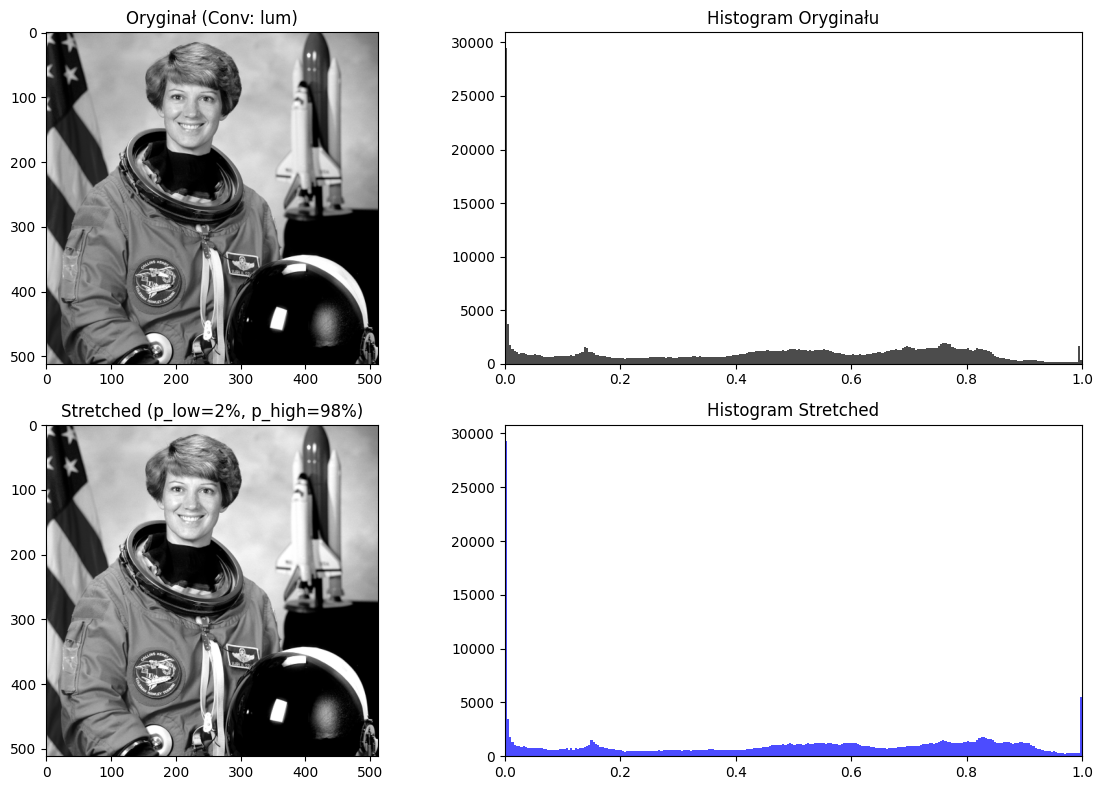

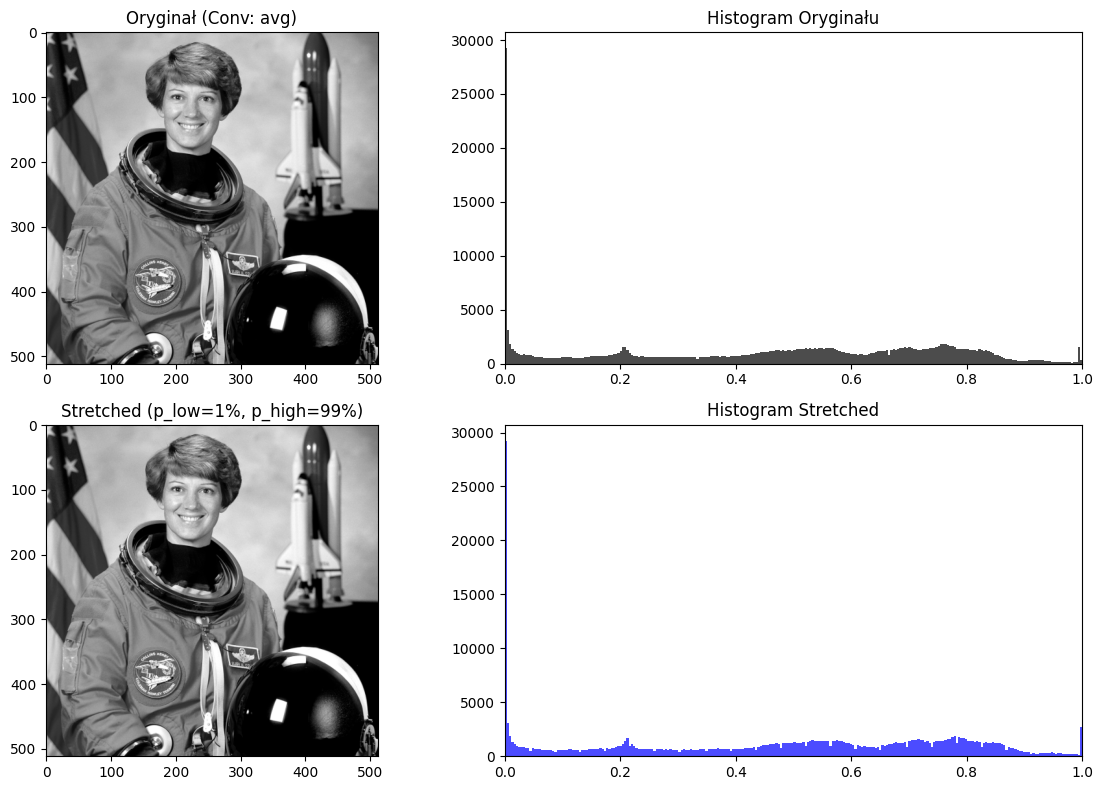

In [2]:
def task1_histogram_explorer(image, p_low=2, p_high=98, conversion='lum'):
    img_float = img_as_float(image)
    
    if img_float.ndim == 3:
        if conversion == 'lum':
            img_gray = color.rgb2gray(img_float)
        elif conversion == 'avg':
            img_gray = np.mean(img_float, axis=2)
        elif conversion == 'r':
            img_gray = img_float[:, :, 0]
        elif conversion == 'g':
            img_gray = img_float[:, :, 1]
        elif conversion == 'b':
            img_gray = img_float[:, :, 2]
        else:
            img_gray = color.rgb2gray(img_float)
    else:
        img_gray = img_float

    v_min, v_max = np.percentile(img_gray, (p_low, p_high))
    img_rescaled = exposure.rescale_intensity(img_gray, in_range=(v_min, v_max))

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    ax = axes.ravel()

    ax[0].imshow(img_gray, vmin=0, vmax=1)
    ax[0].set_title(f'Oryginał (Conv: {conversion})')
    
    ax[1].hist(img_gray.ravel(), bins=256, range=(0, 1), color='black', alpha=0.7)
    ax[1].set_title('Histogram Oryginału')
    ax[1].set_xlim(0, 1)

    ax[2].imshow(img_rescaled, vmin=0, vmax=1)
    ax[2].set_title(f'Stretched (p_low={p_low}%, p_high={p_high}%)')

    ax[3].hist(img_rescaled.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.7)
    ax[3].set_title('Histogram Stretched')
    ax[3].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

image_rgb = data.astronaut()

task1_histogram_explorer(image_rgb, p_low=2, p_high=98, conversion='lum')

task1_histogram_explorer(image_rgb, p_low=1, p_high=99, conversion='avg')

# Zadanie 2

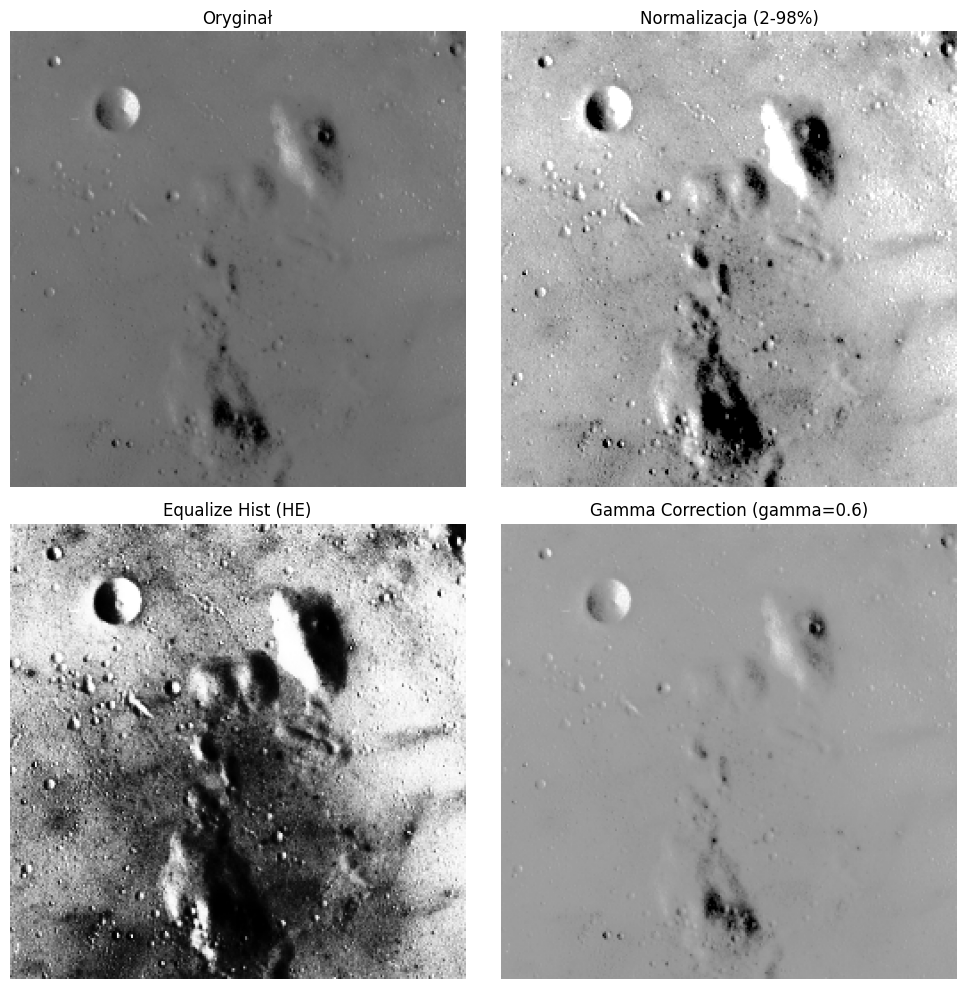

In [3]:
def task2_compare_methods(image, gamma=0.8):
    if image.ndim == 3 and image.shape[2] == 3:
        img_gray = color.rgb2gray(image)
    else:
        img_gray = image

    img_gray = img_as_float(img_gray)

    p2, p98 = np.percentile(img_gray, (2, 98))
    img_norm = exposure.rescale_intensity(img_gray, in_range=(p2, p98))

    img_eq = exposure.equalize_hist(img_gray)

    img_gamma = exposure.adjust_gamma(img_gray, gamma=gamma)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    ax = axes.ravel()

    methods = [
        (img_gray, 'Oryginał'),
        (img_norm, 'Normalizacja (2-98%)'),
        (img_eq, 'Equalize Hist (HE)'),
        (img_gamma, f'Gamma Correction (gamma={gamma})')
    ]

    for i, (img, title) in enumerate(methods):
        ax[i].imshow(img, vmin=0, vmax=1)
        ax[i].set_title(title)
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

image_low_contrast = data.moon()
task2_compare_methods(image_low_contrast, gamma=0.6)

# Zadanie 3

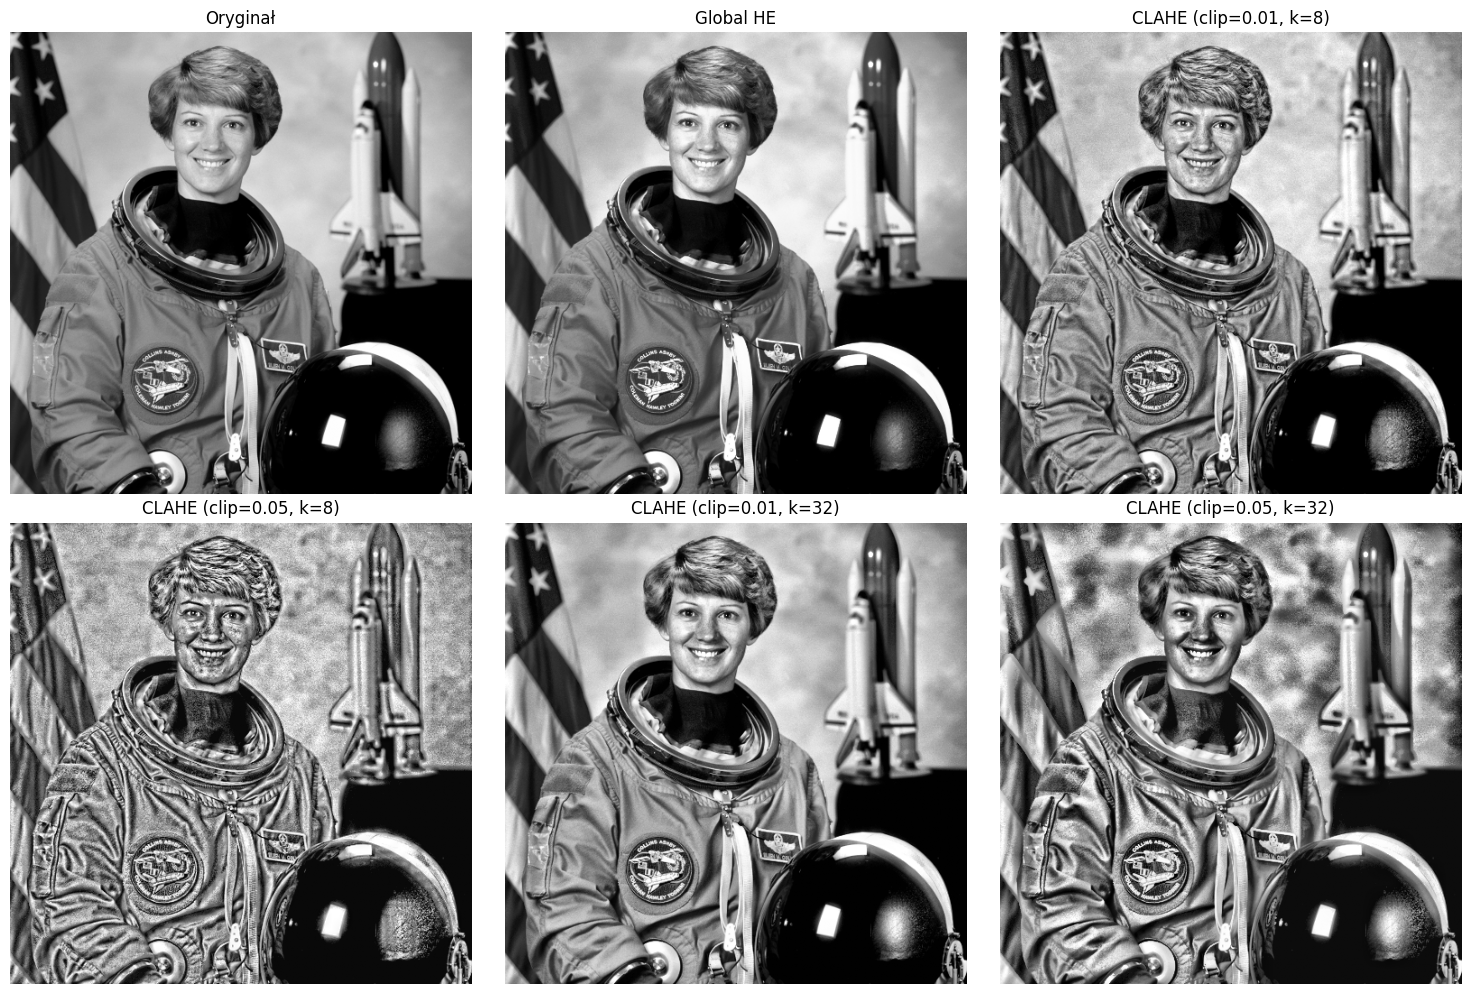

In [4]:
def task3_clahe_demo(image):
    if image.ndim == 3:
        img_gray = color.rgb2gray(image)
    else:
        img_gray = image
    
    img_gray = img_as_float(img_gray)

    variants = [
        {'clip': 0.01, 'kernel': 8, 'name': 'CLAHE (clip=0.01, k=8)'}, 
        {'clip': 0.05, 'kernel': 8, 'name': 'CLAHE (clip=0.05, k=8)'},
        {'clip': 0.01, 'kernel': 32, 'name': 'CLAHE (clip=0.01, k=32)'},
        {'clip': 0.05, 'kernel': 32, 'name': 'CLAHE (clip=0.05, k=32)'},
    ]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    ax = axes.ravel()

    ax[0].imshow(img_gray)
    ax[0].set_title('Oryginał')

    img_global = exposure.equalize_hist(img_gray)
    ax[1].imshow(img_global)
    ax[1].set_title('Global HE')

    for i, var in enumerate(variants):
        img_clahe = exposure.equalize_adapthist(img_gray, clip_limit=var['clip'], kernel_size=var['kernel'])
        ax[i+2].imshow(img_clahe)
        ax[i+2].set_title(var['name'])
    
    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

image_details = data.astronaut()
task3_clahe_demo(image_details)

# Zadanie 4

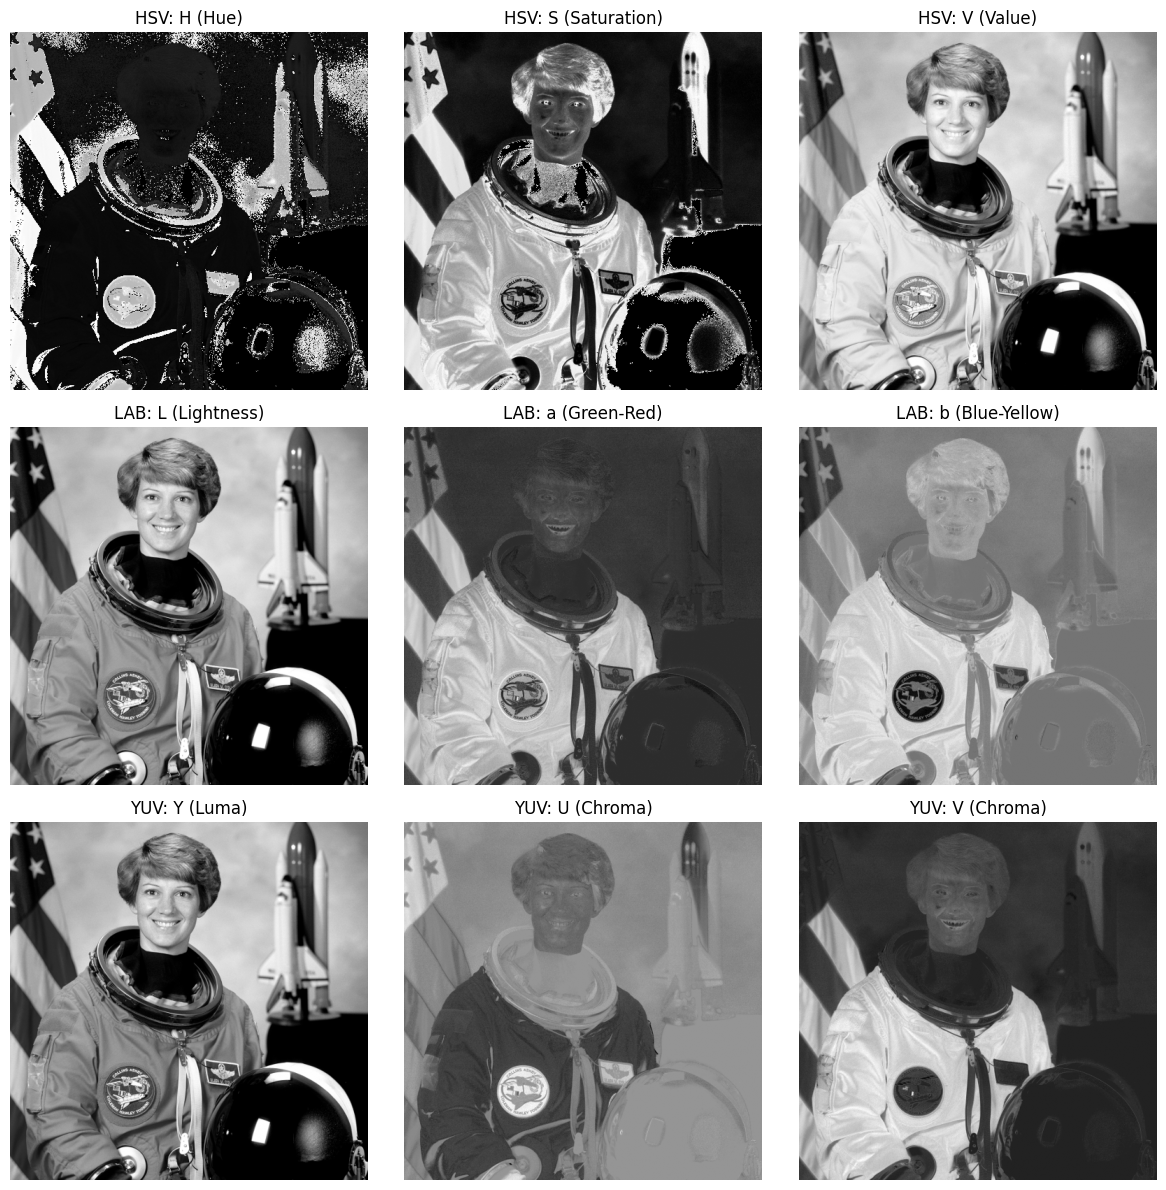

In [ ]:
def task4_color_spaces(image):
    img_hsv = rgb2hsv(image)
    img_lab = rgb2lab(image) 
    img_yuv = rgb2yuv(image)

    h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    
    l_chan, a_chan, b_chan = img_lab[:,:,0], img_lab[:,:,1], img_lab[:,:,2]
    
    y, u, v_yuv = img_yuv[:,:,0], img_yuv[:,:,1], img_yuv[:,:,2]

    spaces = [
        [h, s, v, 'HSV'],
        [l_chan, a_chan, b_chan, 'LAB'],
        [y, u, v_yuv, 'YUV']
    ]
    
    channel_names = [
        ['H (Hue)', 'S (Saturation)', 'V (Value)'],
        ['L (Lightness)', 'a (Green-Red)', 'b (Blue-Yellow)'],
        ['Y (Luma)', 'U (Chroma)', 'V (Chroma)']
    ]

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    for row_idx, (channels, space_name) in enumerate(zip(spaces, ['HSV', 'LAB', 'YUV'])):
        for col_idx, channel in enumerate(channels[:3]):
            ax = axes[row_idx, col_idx]
            
            im_disp = ax.imshow(channel, cmap='gray')
            ax.set_title(f'{space_name}: {channel_names[row_idx][col_idx]}')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

image_color = data.astronaut()
task4_color_spaces(image_color)